# E3900 Presentation demo

In [1]:
import numpy
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Target function and target distribution

function: $f(x) = x^2 - \cos{\pi x} + x$

exact gradient (derivative): $f'(x) = 2x + \pi \sin{\pi x} +1 $

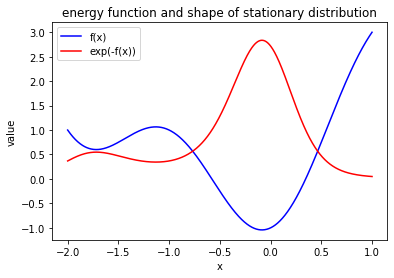

In [2]:
x = numpy.linspace(-2, 1, 1000)
f = lambda x : x**2 - numpy.cos(numpy.pi*x) + x
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, f(x), 'b', label = "f(x)")
ax.plot(x, numpy.exp(-f(x)), 'r', label = "exp(-f(x))")
ax.set_xlabel("x")
ax.set_ylabel("value")
ax.set_title("energy function and shape of stationary distribution")
ax.legend()
plt.show()

## Gradient descent

In [3]:
x = numpy.linspace(-2, 1, 1000)
f = lambda x : x**2 - numpy.cos(numpy.pi*x) + x
f_prime = lambda x : 2*x + numpy.pi * numpy.sin(numpy.pi*x) + 1

res = numpy.empty(10)
res[0] = 0.9
for k in range(0, 9):
    res[k+1] = res[k] - 0.03 * f_prime(res[k])

sub_opt = numpy.empty(10)
sub_opt[0] = -1.3
for k in range(0, 9):
    sub_opt[k+1] = sub_opt[k] - 0.03 * f_prime(sub_opt[k])

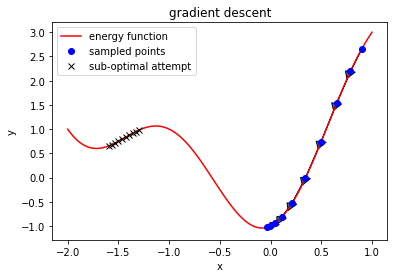

In [4]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x), 'r', label = "energy function")
axes.plot(res, f(res), 'bo', label = "sampled points")
for k in range(0, 7):
    dx = res[k+1] - res[k]
    dy = f(res[k+1]) - f(res[k])
    axes.arrow(res[k], f(res[k]), dx, dy, head_width = 0.10)

axes.plot(sub_opt, f(sub_opt), 'kx', label = "sub-optimal attempt")
for k in range(0, 7):
    dx = sub_opt[k+1] - sub_opt[k]
    dy = f(sub_opt[k+1]) - f(sub_opt[k])
    #axes.arrow(sub_opt[k], f(sub_opt[k]), dx, dy, head_width = 0.10)


axes.legend()
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("gradient descent")
plt.show()

## Langevin dynamics, SGLD

Let's run LD on our energy function.

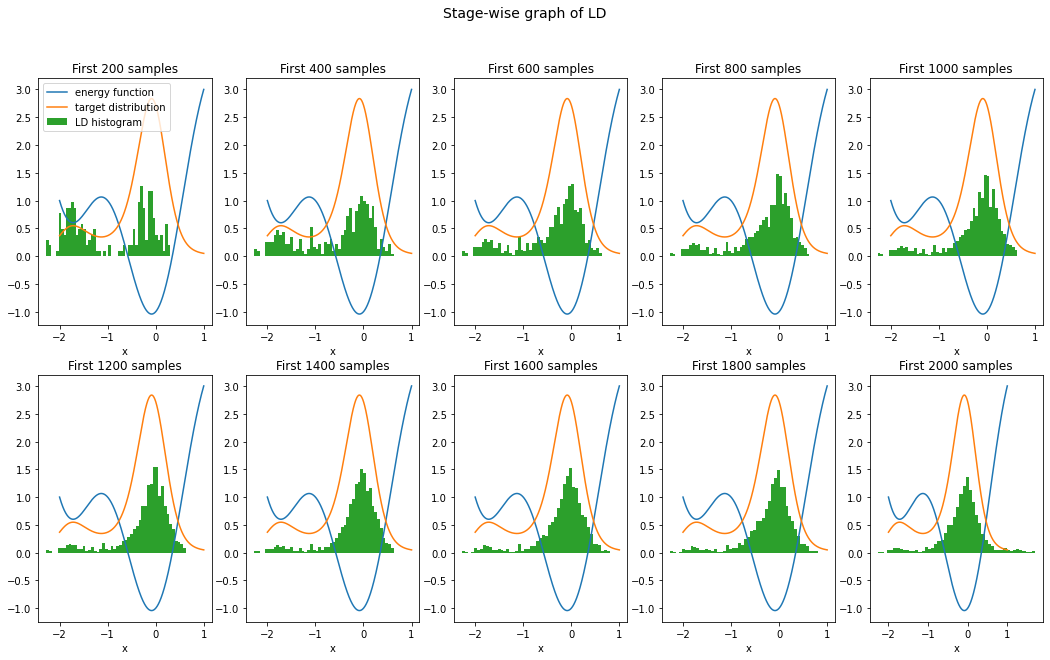

In [7]:
def ld(f, f_prime, N, temp, step, x_0, limit = None):
    '''
    Parameters:
     N: number of iterations
     temp: temperature of iteration
     step: step size, as a function of iteration count, must go to zero
     x_0: initial guess
     limit: a range optinally enforced on x; if x is out of range, then it's forced to the lower or upper bound
     
    Returns: a numpy array of sampled x's
    '''
    
    x_sgd = numpy.empty(N)
    x_sgd[0] = x_0
    
    for i in range(N-1):
        x_new = x_sgd[i] - f_prime(x_sgd[i]) * step(i) + numpy.sqrt(2 * step(i) * temp) * (numpy.random.normal(0,1))
        if limit != None:
            if  x_new > limit[1]:
                x_new = limit[1]
            elif x_new < limit[0]:
                x_new = limit[0]
        x_sgd[i+1] = x_new
    
#         if i < 100:
#             print(x_sgd[i])
    
    return x_sgd

# setup and conditions:
n = 2000
s_log_sq = lambda x : 1 / (numpy.log(2*x+1)+5)**2
t = 1
guess = -1.3
interval = None # x will be generated without limit

# run SGLD
result = ld(f, f_prime, n, temp = t, step = s_log_sq, x_0 = guess, limit = interval)

# stage-wise plotting
fig = plt.figure(figsize=(18, 10))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.plot(x, f(x), label = "energy function")
    ax.plot(x, numpy.exp(-f(x)), label = "target distribution")
    ax.hist(result[:len(result)*(i+1)//10], bins = 50, density = True, label = "LD histogram")
    #the line below is most useful for small number of iterations
    #ax.plot(result[:len(result)*(i+1)//10], f(result[:len(result)*(i+1)//10]), 'bx', label = "sampled x")
    if i == 0:
        ax.legend()
    ax.set_xlabel("x")
    ax.set_title("First {n} samples".format(n=len(result)*(i+1)//10))
fig.suptitle("Stage-wise graph of LD", fontsize=14)
plt.show()

- a remark on temperature

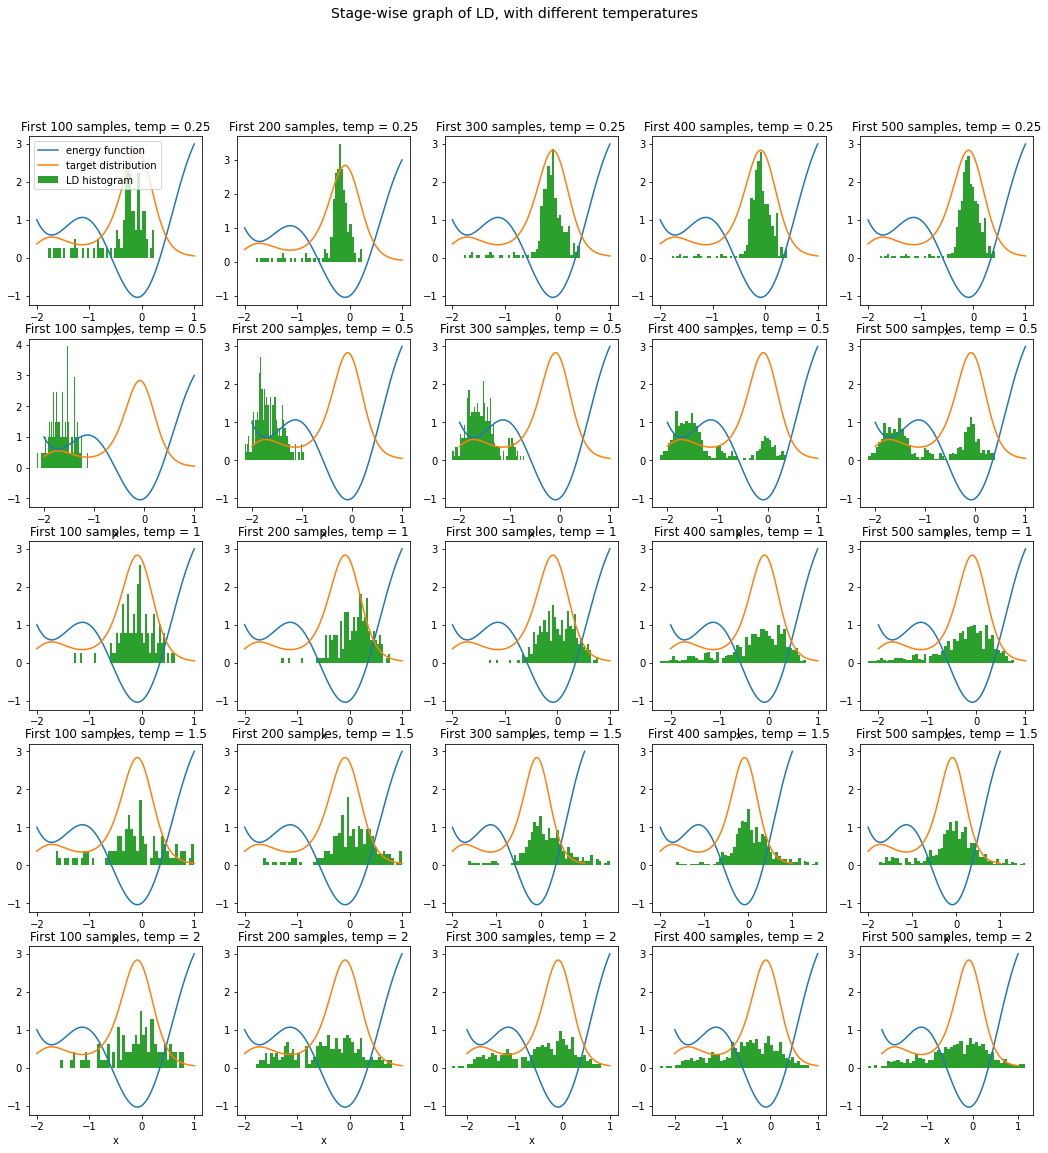

In [11]:
# comparing how temperature affects SGLD
N = 500
s_log_sq = lambda x : 1 / (numpy.log(2*x+1)+5)**2
guess = -1.3
t_li = [0.25, 0.5, 1, 1.5, 2]
interval = None # x will be generated without limit

res_li = []

for tem in t_li:
    res_li.append(ld(f, f_prime, N, temp = tem, step = s_log_sq, x_0 = guess, limit = interval))

# plotting and comparing different temperatures
fig = plt.figure(figsize=(18, 18))
count = 0
for i in range(len(t_li)):
    for j in range(5):
        ax = fig.add_subplot(len(t_li), 5, count+1)
        ax.plot(x, f(x), label = "energy function")
        ax.plot(x, numpy.exp(-f(x)), label = "target distribution")
        ax.hist(res_li[i][:len(res_li[i])*(j+1)//5], bins = 50, density = True, label = "LD histogram")
        #the line below is most useful for small number of iterations
        #ax.plot(result[:len(result)*(i+1)//10], f(result[:len(res_li[i])*(i+1)//10]), 'bx', label = "sampled x")
        if count == 0:
            ax.legend()
        ax.set_xlabel("x")
        ax.set_title("First {n} samples, temp = {t}".format(n=len(res_li[i])*(j+1)//5, t=t_li[i]))
        count += 1
fig.suptitle("Stage-wise graph of LD, with different temperatures", fontsize=14)
plt.show()

